In [25]:
from typing import List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [99]:
X, y = make_regression(n_samples=500, n_features=1, noise=25)
X_train, X_test, y_train, y_test = train_test_split(X, y)

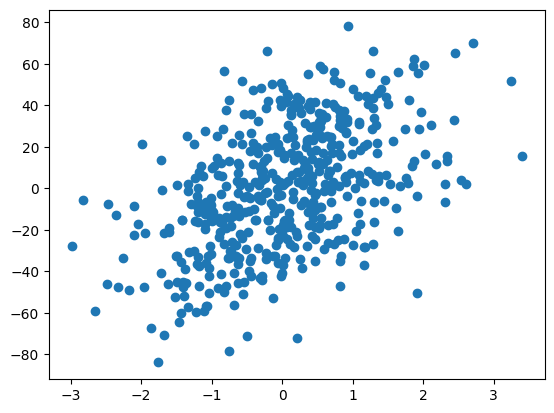

In [100]:
plt.scatter(X, y)

In [200]:
class PolynomialRegrFeatures:
    def __init__(self, degree:int=1, include_bias:bool=True) -> None:
        self.degree = degree
        self.include_bias = include_bias
       
    def fit(self, X:List[List[float]]) -> None:
        self.X = X
        self.bias = 0 if self.include_bias else None
        
    def transform(self) -> np.array:
        X_transformed = np.array([[], []], dtype=float)
        
        for x in self.X:
            X_transformed = np.append(X_transformed, [x**i for i in range(self.degree+1)])
            
        return X_transformed.reshape(-1, self.degree+1)
    
    def fit_transform(self, X:List[List[float]]) -> np.array:
        self.fit(X)
        return self.transform()

In [210]:
my_poly = PolynomialRegrFeatures(degree=5)
my_features = my_poly.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(my_features, y_train)
my_pred = regressor.predict(my_features)

In [211]:
poly = PolynomialFeatures(degree=5, include_bias=True)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
y_predicted = poly_reg_model.predict(poly_features)